# KNN Classifier: Movie Recommender
#### BSAN6070 CA-05 <br> Tina Brauneck<br>3/29/2025

<br> Description: This program is a simple movie recommender model that uses the KNN algorithm to choose the most closely related movie based on genre. Preceding the model is a data quality report and a brief data exploration for the a dataset.<br><br>

#### Table of Contents
##### &emsp; Step 1: Setup and Loading

##### &emsp; Step 2: Assessing Data Quality

&emsp; &emsp; &emsp; Data Quality Report: Continuous Features <br>
&emsp; &emsp; &emsp; Data Quality Report: Categorical Features <br>
&emsp; &emsp; &emsp; Duplicate Check <br>

##### &emsp; Step 3: Data Exploration

&emsp; &emsp; &emsp; Data Distribution <br>
&emsp; &emsp; &emsp; &emsp; Histograms <br>
&emsp; &emsp; &emsp; &emsp; Bar Charts <br>

##### &emsp; Step 4: Modeling

 <br>

## Step 1: Setup and Loading

In [11]:
# This step loads neccessary packages, loads our data into a dataframe, and provides a first look at the data.

In [12]:
#Package imports

#Basic & visualization packages: 
import math
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_bar
#from plotnine.data import mpg

# Modeling:
from sklearn.neighbors import NearestNeighbors

In [13]:
df = pd.read_csv(r"https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv") # read in the data

In [14]:
## print the DataFrame's shape, i.e., number of rows and columns
print(df.shape)

(30, 11)


In [15]:
df.head() #preview the data

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


<br>

In [17]:
# set diplay options for "pretty" data quality reporting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [18]:
pd.set_option('display.width', 1000)

## Step 2: Assessing Data Quality

This section includes a data quality report, cardinality checks, and cleaning.

In [21]:
df.dtypes # This function determines if the feature is categorial or numerical

Movie ID         int64
Movie Name      object
IMDB Rating    float64
Biography        int64
Drama            int64
Thriller         int64
Comedy           int64
Crime            int64
Mystery          int64
History          int64
Label            int64
dtype: object

In [22]:
# All of the categorical data is already encoded as integers.

We will generate different quality reports for continuous variables than categorical variables. The first step is to split the data into these two groups.

In [55]:
# Custom function to split a dataframe by feature type (categorical vs continuous)
def split_cat_cont(df, cont_convert = []):

    # Declare empty lists for the categorical columns and the continuous columns
    categorical_cols = []
    continuous_cols = []

    #Define continuous and categorial columns from the abt:
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous_cols.append(col)
        else:
            categorical_cols.append(col)

    # Transfer any continous columns that were identified as encoded categorical columns in the cardinality checks.

    for col in cont_convert: # This list will hold any columns we want to convert from continuous to categorical.
        if col in continuous_cols:
            continuous_cols.remove(col)
            categorical_cols.append(col)
    return continuous_cols, categorical_cols

In [57]:
continuous_cols, categorical_cols = split_cat_cont(df, cont_convert = []) # Call custom function

In [59]:
# Custom function to generate a data quality report

def data_quality_report(df, report_type):

    # Categorical data and continuous data will be stored in separate lists
    continuous_rows = []
    categorical_rows = []
    
    for col in df[continuous_cols].columns:
        count = df[col].count()
        missing_percentage = df[col].isnull().mean() * 100
        cardinality = df[col].nunique()
        first_quartile = df[col].quantile(0.25)
        mean = df[col].mean()
        median = df[col].median()
        third_quartile = df[col].quantile(0.75)
        max_value = df[col].max()
        std_dev = df[col].std()
            
        continuous_rows.append({
            'Feature': col,
            'Count': count,
            '% Missing': missing_percentage,
            'Card.': cardinality,
            '1st Qrt.': first_quartile,
            'Mean': mean,
            'Median': median,
            '3rd Qrt.': third_quartile,
            'Max': max_value,
            'Std. Dev.': std_dev
        })

    for col in df[categorical_cols]:
        count = df[col].count()
        missing_percentage = df[col].isnull().mean() * 100
        cardinality = df[col].nunique()
        value_counts = df[col].value_counts()
        mode = value_counts.index[0] if not value_counts.empty else 'NA'
        mode_freq = value_counts.iloc[0] if not value_counts.empty else 0
        mode_percentage = (mode_freq / count) * 100 if count > 0 else 0
        second_mode = value_counts.index[1] if len(value_counts) > 1 else 'NA'
        second_mode_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0
        second_mode_percentage = (second_mode_freq / count) * 100 if count > 0 else 0

        categorical_rows.append({
            'Feature': col,
            'Count': count,
            '% Missing': missing_percentage,
            'Card.': cardinality,
            'Mode': mode,
            'Mode Freq.': mode_freq,
            'Mode %': mode_percentage,
            '2nd Mode': second_mode,
            '2nd Mode Freq.': second_mode_freq,
            '2nd Mode %': second_mode_percentage
        })

    continuous_report = pd.DataFrame(continuous_rows)
    categorical_report = pd.DataFrame(categorical_rows)

    if report_type == "cont":
        return continuous_report

    elif report_type == "cat":
        return categorical_report
        
    else:
        raise ValueError("Error: report type options are 'cat' or 'cont'")

In [61]:
dqr_cont = data_quality_report(df,"cont")

In [63]:
dqr_cat = data_quality_report(df,"cat")

#### Data Quality Report: Continuous Features

In [66]:
dqr_cont

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,Movie ID,30,0.0,27,27.75,48.133333,48.50,64.250,98.0,29.288969
1,IMDB Rating,30,0.0,17,7.30,7.696667,7.75,8.175,8.8,0.666169
2,Biography,30,0.0,2,0.00,0.233333,0.00,0.000,1.0,0.430183
3,Drama,30,0.0,2,0.00,0.600000,1.00,1.000,1.0,0.498273
4,Thriller,30,0.0,2,0.00,0.100000,0.00,0.000,1.0,0.305129
5,Comedy,30,0.0,2,0.00,0.100000,0.00,0.000,1.0,0.305129
6,Crime,30,0.0,2,0.00,0.133333,0.00,0.000,1.0,0.345746
7,Mystery,30,0.0,2,0.00,0.100000,0.00,0.000,1.0,0.305129
8,History,30,0.0,2,0.00,0.100000,0.00,0.000,1.0,0.305129
9,Label,30,0.0,1,0.00,0.000000,0.00,0.000,0.0,0.000000


#### Data Quality Report: Categorical Features

In [69]:
dqr_cat

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,Movie Name,30,0.0,30,The Imitation Game,1,3.333333,Ex Machina,1,3.333333


There are no features with missing data. However, from the cardinality, it looks like we have some duplicate movie IDs.

#### Duplicate Check

In [73]:
df[df.duplicated('Movie ID', keep = False)]

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
5,98,21,6.8,0,1,0,0,1,0,1,0
20,57,The DaVinci Code,6.6,0,0,1,0,0,1,0,0
21,57,Stand and Deliver,7.3,0,1,0,0,0,0,0,0
24,98,The Avengers,8.1,0,0,0,0,0,0,0,0
29,46,Queen of Katwe,7.4,1,1,0,0,0,0,0,0


These are clearly unique movies, so Movie ID is useless. We will drop Movie ID and Label, since all the values for Label are the same.

In [76]:
# Make a copy of the dataframe and assign it as our analytics base table (abt). The original df will remain unaltered.
abt=df.copy()

In [78]:
abt = abt.drop(columns = ['Movie ID', 'Label'])

We also need to check for duplicate movies by name:

In [81]:
df[df.duplicated('Movie Name', keep = False)]

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label


There are no duplicates. Let's visualize some of the data before starting on our model...

<br>

### Step 3: Data Exploration

Before visualizing, we divide the ABT dataframe into two feature sets: continuous features and categorical features. We will treat any encoded features as categorical for visualization purposes.

In [87]:
# Assign any encoded categorical columns to cont_convert. In the next step, they will be grouped with the categorical columns, 
# so they are graphed as if they are categorical.
cont_convert = abt.iloc[:,2:].columns.tolist()
cont_convert

['Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']

In [89]:
print(cont_convert)
continuous_cols, categorical_cols = split_cat_cont(abt, cont_convert=cont_convert) # Calling custom function to divide the data

['Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']


In [91]:
# Check the output
abt[categorical_cols].head()

,Movie Name,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
0,The Imitation Game,1,1,1,0,0,0,0
1,Ex Machina,0,1,0,0,0,1,0
2,A Beautiful Mind,1,1,0,0,0,0,0
3,Good Will Hunting,0,1,0,0,0,0,0
4,Forrest Gump,0,1,0,0,0,0,0


In [93]:
# Movie Name is just an identifier, so there is no need to visualize it or keep it in the features we'll use in the model.
categorical_cols.remove('Movie Name')

In [95]:
# Check the output
abt[continuous_cols].head()

,IMDB Rating
0,8.0
1,7.7
2,8.2
3,8.3
4,8.8


### Data Distribution

Histograms

In [99]:
# In this case, we have only one continuous column but still generate a facet wrapped figure that can be 
# re-used with a more complex dataset containing multiple continuous features.

In [101]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme, element_text, theme_classic, scale_y_continuous

# Melt the DataFrame to long format
abt_cont_melted = abt[continuous_cols].melt(var_name='column', value_name='value')

# Calculate the number of rows and columns for the facet grid
n_cols = 4
n_rows = math.ceil(len(continuous_cols) / n_cols)

# Create the plot
cont_plot = (ggplot(abt_cont_melted, aes(x='value')) +
    geom_histogram(bins=20, fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=n_rows, ncol=n_cols, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(panel_spacing=0.03,  # Adjust the spacing between panels
        figure_size=(12/n_cols, n_rows * 3),  # Dynamically set figure size based on number of columns and rows
        strip_text_x=element_text(size=10),
        axis_text=element_text(size=8)  # Adjust axis text size for a tighter layout
        #axis_title=element_text(size=10),  # Option to increase axis title size
        #plot_title=element_text(size=12)  # Option to increase plot title size
                 ) +
    scale_y_continuous(expand=(0, 0))  # Force the y-axis to start at zero
)

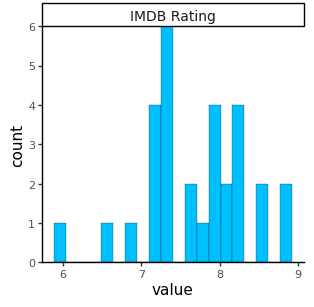

In [103]:
cont_plot.draw()

Bar Plots

In [106]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, theme_classic, theme, element_text
)

# Melt categorical columns for visualization
abt_cat_melted = abt[categorical_cols].melt(var_name='column', value_name='value')

# Design bar plots 
cat_plot = (
    ggplot(abt_cat_melted, aes(x='value')) +
    geom_bar(fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=4, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.03,  # Adjust space between panels
        figure_size=(10, 6),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=12),  # Increase facet label size
        axis_text=element_text(size=12),  # Increase axis text size
        axis_title=element_text(size=16),  # Adjust axis title size
        # plot_title=element_text(size=36)  # Uncomment for plot title size
    )
)

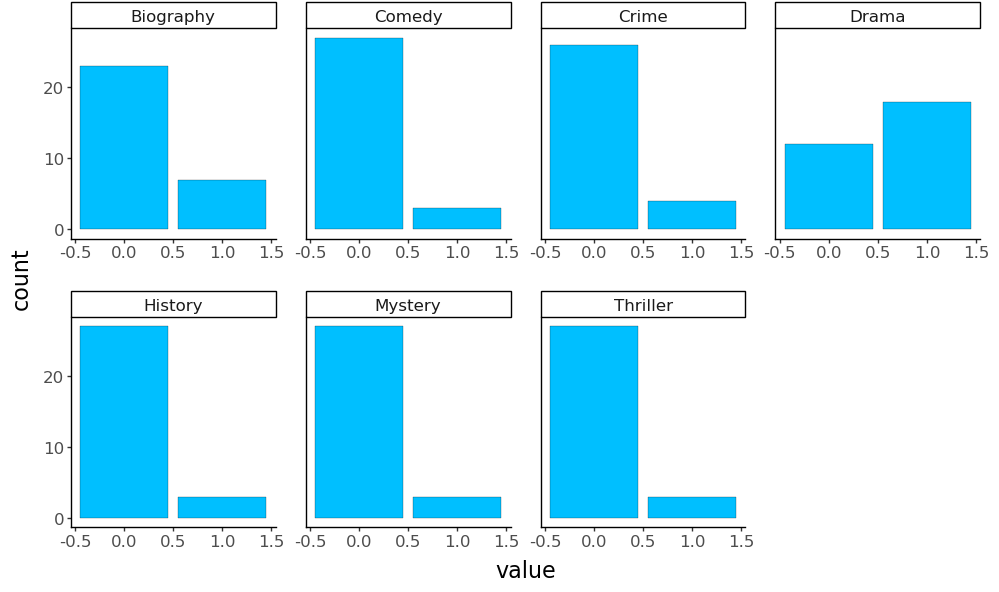

In [108]:
cat_plot.draw()

Note that we have a very low number of comedies, history films, mysteries, and thrillers. KNN will choose movies outside of the same genre if k is too high.

<br>

### Step 4: Modeling

In [113]:
model_data = abt.copy()

In [115]:
model_data = model_data.sort_values(by='IMDB Rating', ascending=False)

In [117]:
y = model_data.pop('Movie Name')

In [119]:
features = model_data[categorical_cols]

We exclude the IMDb rating because it speaks to quality and not necessarily similarity. For example, if a user watches a movie with a low IMDb rating, we don't want to recommend a poorly rated movie just because it is closest in our vector space. Instead we will use the IMDb rating to sort the data before it goes into the KNN algorithm. If two neighbors are equidistant, the model will rely on the sorting order to make a recommendation, i.e., it will recommend the most highly rated movie first of those with similar distances. Our user is more likely to enjoy highly rated movies. If we were working with a larger number of observations, we could use a higher value of k and then filter the results for the top 3 rated movies. However, because we have such a small number of movies, we will just order the data; we don't want to pick up results that are too disimilar from the movie our user watched.

In [122]:
k=3

In [124]:
knn = NearestNeighbors(n_neighbors=k)
knn.fit(features)

NearestNeighbors(n_neighbors=3)

##### Recommendations

In [126]:
# Enter the genre information for the movie from which we are building the prediction
watched_movie_data = pd.DataFrame({
     'Biography': [1],
     'Drama': [1],
     'Thriller': [0],
     'Comedy': [0],
     'Crime': [0],
     'Mystery': [0],
     'History': [1]
})

In [128]:
# Custom function to return the recommended movies based on the KNN model

def recommend_movies(watched_movie_data, n_recommendations=k):
    
    # Find nearest neighbors for the new movie
    distances, indices = knn.kneighbors(watched_movie_data, n_neighbors=k)
    
    # Get recommendations with their IMDb ratings
    recommendations = []
    for i in range(len(distances.flatten())): # loop for each recommendation, i.e., k times
        movie_index = indices.flatten()[i] # Get the index of the movie
        movie_title = y.iloc[movie_index] # Find the index in the y dataframe to get the movie title
        imdb_rating = model_data.iloc[movie_index]['IMDB Rating']
        recommendations.append((movie_title, imdb_rating))
    
    # Sort recommendations by IMDb rating in descending order; we will show the most highly rated movies first
    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    # Convert output into a formatted dataframe
    recommendations_df = pd.DataFrame(recommendations, columns=['Movie Title', 'IMDb Rating'])
    
    return recommendations_df

In [130]:
display(recommend_movies(watched_movie_data,k).style.hide(axis="index"))

Movie Title,IMDb Rating
Hacksaw Ridge,8.200000
A Beautiful Mind,8.200000
12 Years a Slave,8.100000
